# 波士頓房價預測 105405132 廣告四 宋靜

## 整理數據

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import preprocessing

## 資料正規化：

In [2]:
boston_dataset = load_boston()

In [3]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston_normalized = preprocessing.minmax_scale(boston_dataset.data)
boston = pd.DataFrame(boston_normalized, columns=boston_dataset.feature_names)

boston['MEDV'] = boston_dataset.target

In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


# 選擇CRIM、RAD、TAX作為features：

選擇理由：直觀的認為一般在選房的時候主要會考量當地治安(CRIM)、交通(RAD)、稅率(TAX)幾個點。

In [13]:
X = boston.loc[:,["CRIM","RAD","TAX"]].values
Y = boston.MEDV

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

## 進入數據分析三部曲!

step1：開一台函數學習機

In [15]:
model = LinearRegression()

step2：開始訓練

In [16]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

step3：預測

In [17]:
y_predict = model.predict(x_test)

## 畫圖檢驗時間!

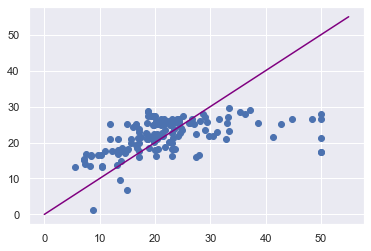

In [24]:
sns.set()

plt.scatter(y_test,y_predict)
plt.xlim = [0,55]
plt.ylim = [0,55]
plt.plot([0,55],[0,55],"purple")

## 結果：超不準.......